In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Get the Data



In [ ]:
import pandas as pd

link = '/content/drive/MyDrive/Saber ML Course/assigment 3/breast_cancer.csv'
data = pd.read_csv(link,header=None,encoding='utf-8')
data.tail()

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
565,926424,M,21.56,22.39,142,1479,0.111,0.1159,0.2439,0.1389,...,26.4,166.1,2027,0.141,0.2113,0.4107,0.2216,0.206,0.07115,NaN
566,926682,M,20.13,28.25,131.2,1261,0.0978,0.1034,0.144,0.09791,...,38.25,155,1731,0.1166,0.1922,0.3215,0.1628,0.2572,0.06637,NaN
567,926954,M,16.6,28.08,108.3,858.1,0.08455,0.1023,0.09251,0.05302,...,34.12,126.7,1124,0.1139,0.3094,0.3403,0.1418,0.2218,0.0782,NaN
568,927241,M,20.6,29.33,140.1,1265,0.1178,0.277,0.3514,0.152,...,39.42,184.6,1821,0.165,0.8681,0.9387,0.265,0.4087,0.124,NaN
569,92751,B,7.76,24.54,47.92,181,0.05263,0.04362,0,0,...,30.37,59.16,268.6,0.08996,0.06444,0,0,0.2871,0.07039,NaN


# Get features (x) / labels (y)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# get labels (y) from data
y = data.iloc[1:,1].values
#y = np.where(y == 'M',1,-1)

# get features (x) from data
x = data.iloc[1:,2:32].values


In [ ]:
y

array(['M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'B', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B',
       'B', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M',
       'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'M', 'B', 'M',
       'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'M', 'B', 'B', 'B',
       'M', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B',
       'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M',
       'B', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B',
       'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'M', 'M',
       'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M

In [ ]:
x

array([['17.99', '10.38', '122.8', ..., '0.2654', '0.4601', '0.1189'],
       ['20.57', '17.77', '132.9', ..., '0.186', '0.275', '0.08902'],
       ['19.69', '21.25', '130', ..., '0.243', '0.3613', '0.08758'],
       ...,
       ['16.6', '28.08', '108.3', ..., '0.1418', '0.2218', '0.0782'],
       ['20.6', '29.33', '140.1', ..., '0.265', '0.4087', '0.124'],
       ['7.76', '24.54', '47.92', ..., '0', '0.2871', '0.07039']],
      dtype=object)

# ٍSplit data

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify=y)

# decision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

dtc = DecisionTreeClassifier(max_depth=20)
dtc.fit(x_train, y_train)
y_pred = dtc.predict(x_test)
print(accuracy_score(y_pred,y_test))

0.935672514619883


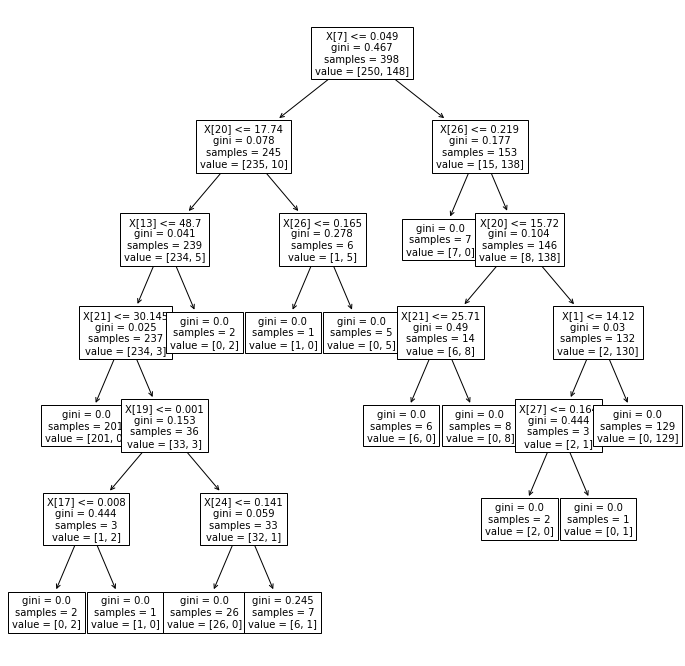

In [ ]:
plt.figure(figsize=(12,12))
plot_tree(dtc,fontsize=10)
plt.show()

# Get features (x) / labels (y)

In [ ]:

# get labels (y) from data
y = data.iloc[1:,1].values
#y = np.where(y == 'M',1,-1)

# get features (x) from data
x = data.iloc[1:,2:32].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify=y)

# Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=50,max_depth=6)
forest.fit(x_train, y_train)
y_pred = dtc.predict(x_test)
print(accuracy_score(y_pred,y_test))


0.9707602339181286


# Get features (x) / labels (y)

In [ ]:
# get labels (y) from data
y = data.iloc[1:,1].values
#y = np.where(y == 'M',1,-1)

# get features (x) from data
x = data.iloc[1:,2:32].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify=y)

# K-nearest nieghbours

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
y_pred = dtc.predict(x_test)
print(accuracy_score(y_pred,y_test))


0.9766081871345029


# Get features (x) / labels (y)

In [ ]:
# get labels (y) from data
y = data.iloc[1:,1].values
y = np.where(y == 'M',1,-1)

# get features (x) from data
x = data.iloc[1:,2:32].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify=y)

# Perceptron

In [ ]:
from sklearn.linear_model import Perceptron
ppn = Perceptron(eta0=0.1, max_iter=100)
ppn.fit(x_train, y_train)
y_pred = ppn.predict(x_test)
print(accuracy_score(y_pred,y_test))

0.8713450292397661


# Get features (x) / labels (y)

In [4]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np

link = '/content/drive/MyDrive/Saber ML Course/assigment 3/breast_cancer.csv'
data = pd.read_csv(link,header=None,encoding='utf-8')
data.tail()

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# get labels (y) from data
y = data.iloc[1:,1].values
y = np.where(y == 'M',1,-1)

# get features (x) from data
x = data.iloc[1:,2:32].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify=y)

link = '/content/drive/MyDrive/Saber ML Course/assigment 3/breast_cancer.csv'
data = pd.read_csv(link,header=None,encoding='utf-8')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=100, multi_class='ovr')
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
print(accuracy_score(y_pred,y_test))

0.9824561403508771


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', random_state=1, gamma=0.0001, C=10.0)
svm.fit(x_train, y_train)
y_pred = svm.predict(x_test)
print(accuracy_score(y_pred,y_test))

0.9649122807017544


# AdalineGD

In [8]:
class AdalineGD():
  def __init__(self, eta=0.01, n_iter=50, random_state=1):
    self.eta = eta
    self.n_iter = n_iter
    self.random_state = random_state
  
  def fit(self, X, y):
    
    rgen = np.random.RandomState(self.random_state)
    X = np.insert(X, 0, 1, axis=1)
    self.w_ = rgen.normal(loc=0, scale=0.01, size=X.shape[1])
    self.cost_ = []

    for i in range(self.n_iter):
      net_input = self.net_input(X)
      output = self.activation(net_input)

      errors = (y-output)

      update = self.eta * X.T.dot(errors)

      self.w_ = self.w_ + update

      cost = 0.5 *(errors**2).sum()

      self.cost_.append(cost)

    return self

  
  def net_input(self, X):
    Z = np.dot(X, self.w_)
    return Z

  def activation(self, Z):
    return Z

  def predict(self, X):
      X = np.insert(X, 0, 1, axis=1)
      Z = self.net_input(X)
      output = self.activation(Z)
      y_hat = np.where(output >= 0, 1, -1)
      return y_hat


In [6]:

# get labels (y) from data
y = data.iloc[1:,1].values
y = np.where(y == 'M',1,-1)

# get features (x) from data
x = data.iloc[1:,2:32].values

In [ ]:
x

array([['17.99', '10.38', '122.8', ..., '0.2654', '0.4601', '0.1189'],
       ['20.57', '17.77', '132.9', ..., '0.186', '0.275', '0.08902'],
       ['19.69', '21.25', '130', ..., '0.243', '0.3613', '0.08758'],
       ...,
       ['16.6', '28.08', '108.3', ..., '0.1418', '0.2218', '0.0782'],
       ['20.6', '29.33', '140.1', ..., '0.265', '0.4087', '0.124'],
       ['7.76', '24.54', '47.92', ..., '0', '0.2871', '0.07039']],
      dtype=object)

In [ ]:
ada = AdalineGD(n_iter=500, eta=0.01)
ada.fit(x.astype(float), y) # feature matrix must be float: x.astype(float)
y_pred = ada.predict(x_test.astype(float))
print(accuracy_score(y_pred,y_test))
